#**IMPORTING THE DEPENDENCIES**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report



#**DATA COLLECTION**



In [ ]:
# Loading the heart stroke dataset to the pandas dataframe
heart_failure_dataset = pd.read_csv("/content/heart_failure_dataset.csv")


#**DATA PRE-PROCESSING**

In [ ]:
# Printing the first five rows of the dataset
heart_failure_dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
# Counting the number of rows and columns of the dataset
heart_failure_dataset.shape

(299, 13)

In [ ]:
# Gettting the statistical measures of the dataset
heart_failure_dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
# Counting the number of values of death events and non-deadth-events
heart_failure_dataset["DEATH_EVENT"].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

Label 0---> Death Does Not Occurred


Label 1---> Death Occurred

In [ ]:
# Calculating the mean of all the attributes for "Death_Event" column
heart_failure_dataset.groupby("DEATH_EVENT").mean()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,58.761906,0.408867,540.054187,0.418719,40.26601,0.325123,266657.489901,1.184877,137.216749,0.650246,0.325123,158.339901
1,65.215281,0.479167,670.197917,0.416667,33.46875,0.406250,256381.044792,1.835833,135.375000,0.645833,0.312500,70.885417


In [ ]:
# Separating the data and labels from the dataset
X = heart_failure_dataset.drop(columns="DEATH_EVENT", axis=1)
Y = heart_failure_dataset["DEATH_EVENT"]

In [ ]:
print(X)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64


#**DATA STANDARDIZATION**

In [ ]:
# Standardizing the dataset to make the data in same range
scaler = StandardScaler()

In [ ]:
# Fitting the dataset to the standardized function
scaler.fit(X)

StandardScaler()

In [ ]:
# Storing the transformed data to new variable called standardized_data
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 1.19294523e+00 -8.71104775e-01  1.65728387e-04 ...  7.35688190e-01
  -6.87681906e-01 -1.62950241e+00]
 [-4.91279276e-01 -8.71104775e-01  7.51463953e+00 ...  7.35688190e-01
  -6.87681906e-01 -1.60369074e+00]
 [ 3.50832977e-01 -8.71104775e-01 -4.49938761e-01 ...  7.35688190e-01
   1.45416070e+00 -1.59078490e+00]
 ...
 [-1.33339153e+00 -8.71104775e-01  1.52597865e+00 ... -1.35927151e+00
  -6.87681906e-01  1.90669738e+00]
 [-1.33339153e+00 -8.71104775e-01  1.89039811e+00 ...  7.35688190e-01
   1.45416070e+00  1.93250906e+00]
 [-9.12335403e-01 -8.71104775e-01 -3.98321274e-01 ...  7.35688190e-01
   1.45416070e+00  1.99703825e+00]]


In [ ]:
X = standardized_data
Y = heart_failure_dataset["DEATH_EVENT"]

In [ ]:
print(X)

[[ 1.19294523e+00 -8.71104775e-01  1.65728387e-04 ...  7.35688190e-01
  -6.87681906e-01 -1.62950241e+00]
 [-4.91279276e-01 -8.71104775e-01  7.51463953e+00 ...  7.35688190e-01
  -6.87681906e-01 -1.60369074e+00]
 [ 3.50832977e-01 -8.71104775e-01 -4.49938761e-01 ...  7.35688190e-01
   1.45416070e+00 -1.59078490e+00]
 ...
 [-1.33339153e+00 -8.71104775e-01  1.52597865e+00 ... -1.35927151e+00
  -6.87681906e-01  1.90669738e+00]
 [-1.33339153e+00 -8.71104775e-01  1.89039811e+00 ...  7.35688190e-01
   1.45416070e+00  1.93250906e+00]
 [-9.12335403e-01 -8.71104775e-01 -3.98321274e-01 ...  7.35688190e-01
   1.45416070e+00  1.99703825e+00]]


In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64


#**DATA VISUALIZATION**

**STRIP PLOT TO HAVE A LOOK AT COMPLETE DATASET**

<Axes: >

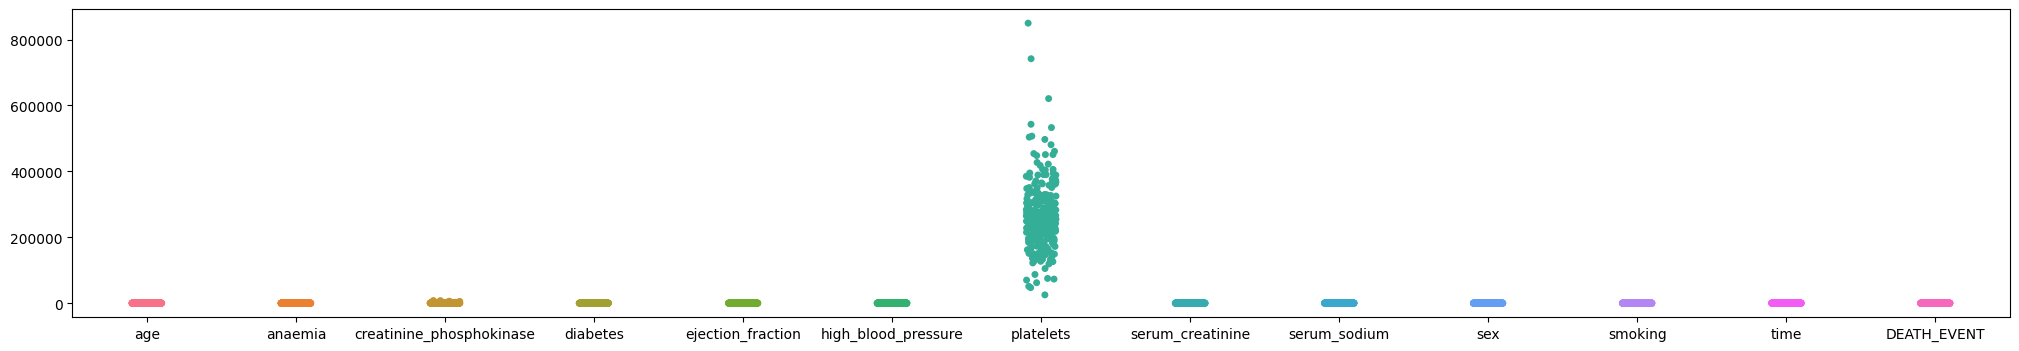

In [ ]:
# Visualizing the data through strip plot
plt.figure(figsize=(25, 4))
sns.stripplot(data=heart_failure_dataset)

**BAR PLOTS TO VISUALIZE CATEGORICAL VARIABLES OF THE DATASET**

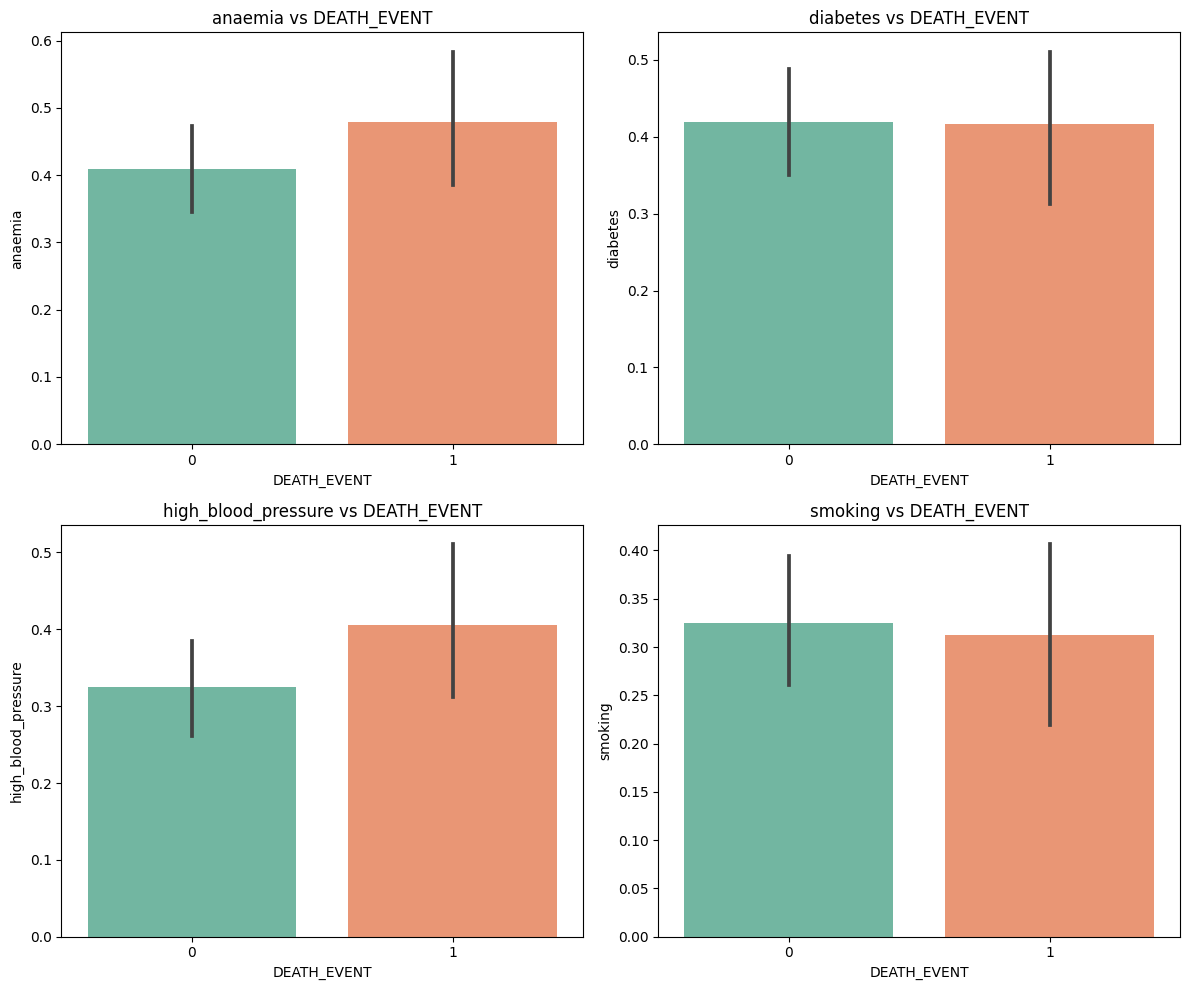

In [ ]:
# Selecting the variables to plot against 'Death Event'
categorical_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking']

# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()
sns.set_palette("Set2")


# Loop through the selected variables and create individual plots
for i, variable in enumerate(categorical_features):
    sns.barplot(x='DEATH_EVENT', y=variable, data=heart_failure_dataset, ax=axes[i])
    axes[i].set_title(f'{variable} vs DEATH_EVENT')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()


**VIOLIN PLOT FOR VISUALIZING CONTINIOUS VARIABLES IN THE DATASET**

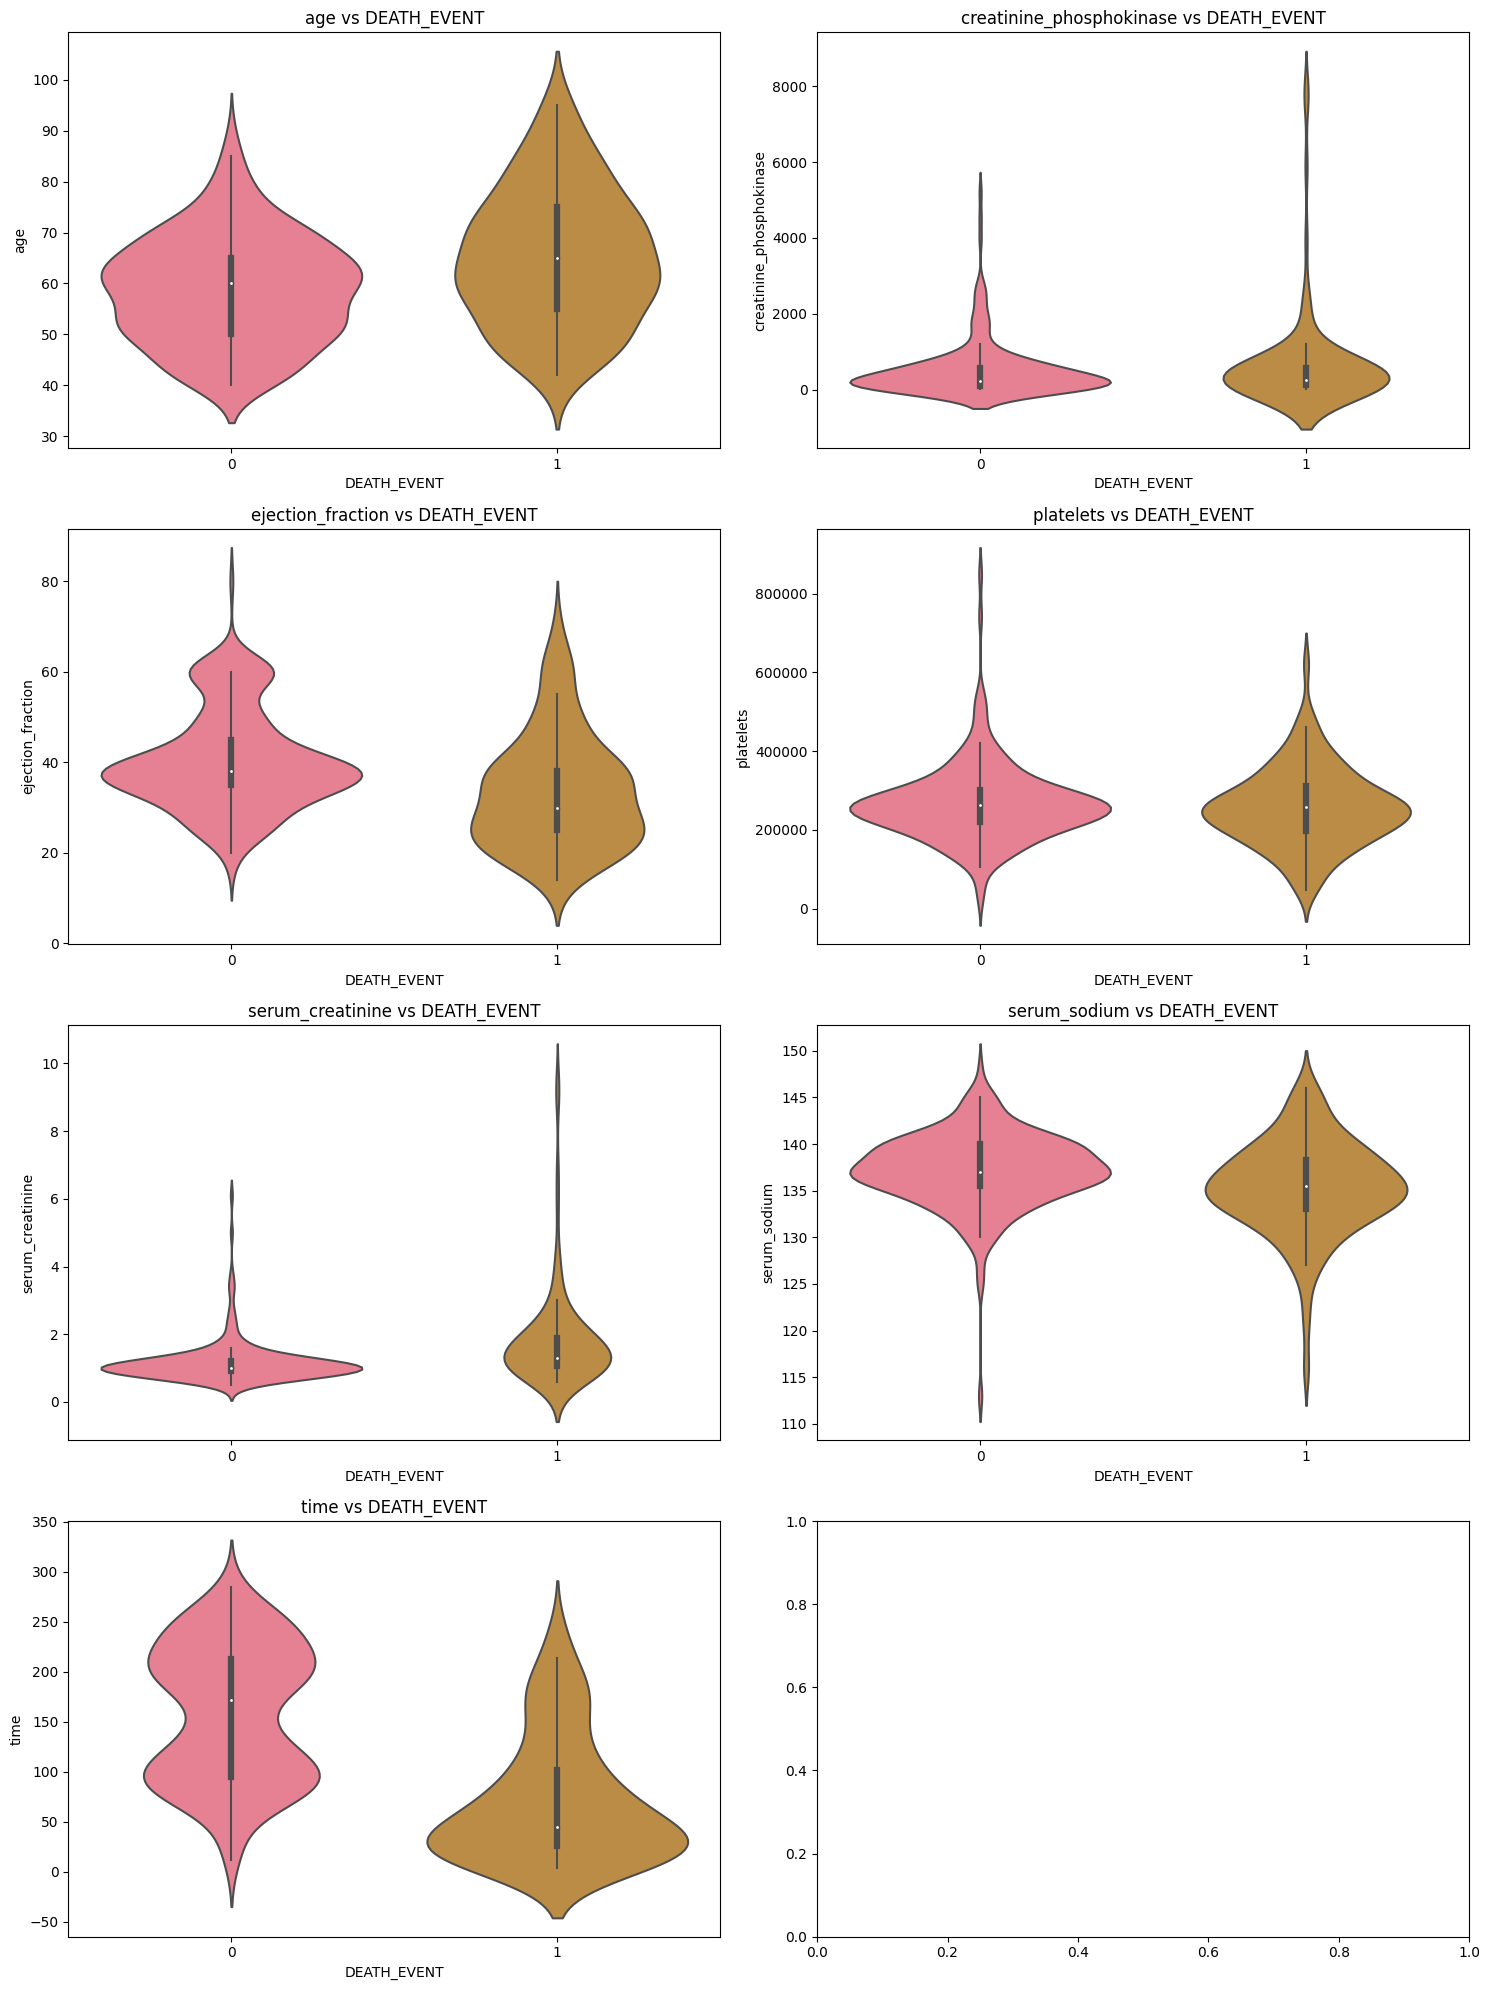

In [ ]:
# Selecting the continious variables to plot against 'Death Event'
continuous_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
                       'serum_creatinine', 'serum_sodium', 'time']

# Create a grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()
sns.set_palette("husl", 8)


# Loop through the selected variables and create individual plots
for i, variable in enumerate(continuous_features):
    sns.violinplot(x='DEATH_EVENT', y=variable, data=heart_failure_dataset, ax=axes[i])
    axes[i].set_title(f'{variable} vs DEATH_EVENT')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()


#**TRAIN-TEST-SPLIT**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42 )

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(299, 12) (239, 12) (60, 12)


#**TRAINING THE MODEL**

#**SUPPORT VECTOR MACHINE**

In [ ]:
classifier = svm.SVC(kernel="linear")

In [ ]:
# Training the Support vector machine classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
# Training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

#**MODEL EVALUATION**



In [ ]:
# ACCURACY SCORE
# Accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print("Accuracy score of the training data : ", training_data_accuracy)

Accuracy score of the training data :  0.8744769874476988


In [ ]:
# ACCURACY SCORE
# Accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print("Accuracy score of the test data : ", test_data_accuracy)

Accuracy score of the test data :  0.8


In [ ]:

# Initializing the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
decision_tree.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = decision_tree.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(Y_test, y_pred)
report = classification_report(Y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.6166666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.77      0.70        35
           1       0.56      0.40      0.47        25

    accuracy                           0.62        60
   macro avg       0.60      0.59      0.58        60
weighted avg       0.61      0.62      0.60        60



#**Making a Predictive System**

In [ ]:
input_data = (42,0,102,1,40,0,237000,1.2,140,1,0,74)

# Changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print("The Person is still alive")
else:
  print("The Person has lost his life due to Heart Failure")


[[-1.58602521 -0.87110478 -0.49536215  1.1798305   0.16219911 -0.73568819
  -0.26994963 -0.18772618  0.76606383  0.73568819 -0.68768191 -0.72609371]]
[0]
The Person is still alive


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
